# ProblemStatement: Logistic Regression and Linear Discriminant Analysis
### You are hired by the Government to do an analysis of car crashes. You are provided details of car crashes, among which some people survived and some didn't. You have to help the government in predicting whether a person will survive or not on the basis of the information given in the data set so as to provide insights that will help the government to make stronger laws for car manufacturers to ensure safety measures. Also, find out the important factors on the basis of which you made your predictions.

### Questions for Problem 2:

2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. (8 marks)

2.2) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis). (8 marks)

2.3) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Compare both the models and write inferences, which model is best/optimized. (8 marks)

2.4) Inference: Based on these predictions, what are the insights and recommendations. (6 marks)

### Data Dictionary for Car_Crash
1. dvcat: factor with levels (estimated impact speeds) 1-9km/h, 10-24, 25-39, 40-54, 55+
2. weight: Observation weights, albeit of uncertain accuracy, designed to account for varying sampling probabilities. (The inverse probability weighting estimator can be used to demonstrate causality when the researcher cannot conduct a controlled experiment but has observed data to model)
3. Survived: factor with levels Survived or not_survived
4. airbag: a factor with levels none or airbag
5. seatbelt: a factor with levels none or belted
6. frontal: a numeric vector; 0 = non-frontal, 1=frontal impact
7. sex: a factor with levels f: Female or m: Male
8. ageOFocc: age of occupant in years
9. yearacc: year of accident
10. yearVeh: Year of model of vehicle; a numeric vector
11. abcat: Did one or more (driver or passenger) airbag(s) deploy? This factor has levels deploy, nodeploy and unavail
12. occRole: a factor with levels driver or pass: passenger
13. deploy: a numeric vector: 0 if an airbag was unavailable or did not deploy; 1 if one or more bags deployed.
14. injSeverity: a numeric vector; 0: none, 1: possible injury, 2: no incapacity, 3: incapacity, 4: killed; 5: unknown, 6: prior death
15. caseid: character, created by pasting together the populations sampling unit, the case number, and the vehicle number. Within each year, use this to uniquely identify the vehicle.


### Importing necessary libraries

In [225]:
import numpy as np
import pandas as pd
# visualisations
import matplotlib.pyplot as plt   
import matplotlib.style
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [226]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

**load the dataset into pandas dataframe**

In [227]:
df = pd.read_csv("Car_Crash.csv")

### Basic Data Exploration

In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

* head of the dataset

* shape of the dataset

* info of the dataset

* summary of the dataset

**check the loaded data**

In [228]:
df.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [229]:
df.tail()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
11213,11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
11214,11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2
11216,11216,25-39,10.474,survived,airbag,belted,1,m,17,2002,1999.0,deploy,pass,1,0.0,82:110:2


**- data is loaded properly into the dataframe df**

**shape of the dataset**

In [230]:
df.shape

(11217, 16)

- 11217 observations were provided for analysis 
- 16 features are available for analysis

**Basic information of the dataset**

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  float64
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


1. Null values are present in the data 
2. Float,int and object data types are present in our data

In [232]:
# drop the id column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

**5-POINT summary of the dataset**

In [233]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dvcat,11217,5,10-24,5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,11217.0,NaN,NaN,NaN,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
Survived,11217,2,survived,10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airbag,11217,2,airbag,7064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seatbelt,11217,2,belted,7849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frontal,11217.0,NaN,NaN,NaN,0.644022,0.47883,0.0,0.0,1.0,1.0,1.0
sex,11217,2,m,6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ageOFocc,11217.0,NaN,NaN,NaN,37.427654,18.192429,16.0,22.0,33.0,48.0,97.0
yearacc,11217.0,NaN,NaN,NaN,2001.103236,1.056805,1997.0,2001.0,2001.0,2002.0,2002.0
yearVeh,11217.0,NaN,NaN,NaN,1994.177944,5.658704,1953.0,1991.0,1995.0,1999.0,2003.0


In [234]:
df = df.rename(columns = {"dvcat":"impact_speeds","ageOFocc":"age_of_occupant","yearacc":"year_of_accident","yearVeh":"year_of_model",
                    "abcat":"airbag_deploy_type","occRole":"Occupant_role","deploy":"airbag_deployed_or_not"
                    })

In [319]:
df.head().T

,0,1,2,3,4
impact_speeds,5,3,5,5,5
weight,0.035271,0.116747,0.035271,0.035271,0.017421
Survived,1,1,1,1,1
seatbelt,1,0,0,0,1
frontal,1,0,1,1,1
age_of_occupant,0.225352,0.535211,0.71831,0.676056,0.098592
airbag_deploy_type,3,2,3,3,3
injSeverity,4.0,4.0,4.0,4.0,4.0
car_service_years,0.478261,0.173913,0.26087,0.26087,0.521739
sex_m,1,0,1,0,1


**Check for duplicate records**

In [236]:
df.duplicated().sum()

0

No duplicate records are presnet

### Dropping the uncessary columns which are not usefull in prediction

1. airbag columns tells us if the airbag is present or not 
2. airbag_deploy_type tells us if the airbag is deployed or notdeployed or airbag is not available
3. airbag_deployed_or_not tells us if the airbag is deployed or not 

    All the 3 features are carrying same information
        hence we decide to retain the airbag_deploy_type variable which can inform us the availability of the airbag as well as the deployment status of the airbag

4. caseid is a unique identifier which will not provide any insight into prediction hence we decided to drop that feature also

In [237]:
df.drop(['airbag','airbag_deployed_or_not','caseid'],axis=1,inplace=True)

In [238]:
df

,impact_speeds,weight,Survived,seatbelt,frontal,sex,age_of_occupant,year_of_accident,year_of_model,airbag_deploy_type,Occupant_role,injSeverity
0,55+,27.078,Not_Survived,none,1,m,32,1997,1987.0,unavail,driver,4.0
1,25-39,89.627,Not_Survived,belted,0,f,54,1997,1994.0,nodeploy,driver,4.0
2,55+,27.078,Not_Survived,belted,1,m,67,1997,1992.0,unavail,driver,4.0
3,55+,27.078,Not_Survived,belted,1,f,64,1997,1992.0,unavail,pass,4.0
4,55+,13.374,Not_Survived,none,1,m,23,1997,1986.0,unavail,driver,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11212,25-39,3179.688,survived,belted,1,m,17,2002,1985.0,unavail,driver,0.0
11213,10-24,71.228,survived,belted,1,m,54,2002,2002.0,nodeploy,driver,2.0
11214,10-24,10.474,survived,belted,1,f,27,2002,1990.0,deploy,driver,3.0
11215,25-39,10.474,survived,belted,1,f,18,2002,1999.0,deploy,driver,0.0


So now we are left with 12 features and 11217 observations for our study

**New feature creation:**
    From the Year of accident and year of the vehicle model we can derive the age of the car before accident

In [239]:
df['year_of_model'] =df['year_of_model'].astype('int64')
df['car_service_years'] = df['year_of_accident']-df['year_of_model']

In [240]:
df.head()

,impact_speeds,weight,Survived,seatbelt,frontal,sex,age_of_occupant,year_of_accident,year_of_model,airbag_deploy_type,Occupant_role,injSeverity,car_service_years
0,55+,27.078,Not_Survived,none,1,m,32,1997,1987,unavail,driver,4.0,10
1,25-39,89.627,Not_Survived,belted,0,f,54,1997,1994,nodeploy,driver,4.0,3
2,55+,27.078,Not_Survived,belted,1,m,67,1997,1992,unavail,driver,4.0,5
3,55+,27.078,Not_Survived,belted,1,f,64,1997,1992,unavail,pass,4.0,5
4,55+,13.374,Not_Survived,none,1,m,23,1997,1986,unavail,driver,4.0,11


**Now we can drop Year_of_accident and year_of_model from the dataset**

In [241]:
df.drop(['year_of_accident','year_of_model'],axis=1,inplace=True)

In [242]:
df

,impact_speeds,weight,Survived,seatbelt,frontal,sex,age_of_occupant,airbag_deploy_type,Occupant_role,injSeverity,car_service_years
0,55+,27.078,Not_Survived,none,1,m,32,unavail,driver,4.0,10
1,25-39,89.627,Not_Survived,belted,0,f,54,nodeploy,driver,4.0,3
2,55+,27.078,Not_Survived,belted,1,m,67,unavail,driver,4.0,5
3,55+,27.078,Not_Survived,belted,1,f,64,unavail,pass,4.0,5
4,55+,13.374,Not_Survived,none,1,m,23,unavail,driver,4.0,11
...,...,...,...,...,...,...,...,...,...,...,...
11212,25-39,3179.688,survived,belted,1,m,17,unavail,driver,0.0,17
11213,10-24,71.228,survived,belted,1,m,54,nodeploy,driver,2.0,0
11214,10-24,10.474,survived,belted,1,f,27,deploy,driver,3.0,12
11215,25-39,10.474,survived,belted,1,f,18,deploy,driver,0.0,3


### Check for missing values:

In [243]:
df.isnull().sum()

impact_speeds          0
weight                 0
Survived               0
seatbelt               0
frontal                0
sex                    0
age_of_occupant        0
airbag_deploy_type     0
Occupant_role          0
injSeverity           77
car_service_years      0
dtype: int64

In [244]:
77/11217*100

0.6864580547383435

* We will impute the null values with mode since it is a category

In [245]:
mode = df['injSeverity'].mode()

In [246]:
mode[0]

3.0

In [247]:
df['injSeverity'] = df['injSeverity'].fillna(mode[0])

In [248]:
df.isnull().sum()

impact_speeds         0
weight                0
Survived              0
seatbelt              0
frontal               0
sex                   0
age_of_occupant       0
airbag_deploy_type    0
Occupant_role         0
injSeverity           0
car_service_years     0
dtype: int64

**Missing values are treated**

### Univariate analysis :

In [249]:
df['frontal'] = pd.Categorical(df['frontal'])

In [250]:
df['injSeverity'] = pd.Categorical(df['injSeverity'])

In [251]:
df.dtypes

impact_speeds           object
weight                 float64
Survived                object
seatbelt                object
frontal               category
sex                     object
age_of_occupant          int64
airbag_deploy_type      object
Occupant_role           object
injSeverity           category
car_service_years        int64
dtype: object

In [252]:
#Lets separate the numeric and categorical variables to create visualizatons
df_categorical = [feature for feature in df.columns if df[feature].dtype not in ['int64','float64']]

In [253]:
df_num = ['weight','age_of_occupant','car_service_years']

In [254]:
df_num

['weight', 'age_of_occupant', 'car_service_years']

In [255]:
df_categorical

['impact_speeds',
 'Survived',
 'seatbelt',
 'frontal',
 'sex',
 'airbag_deploy_type',
 'Occupant_role',
 'injSeverity']

### Visualizing the continuous variables:

Histogram:

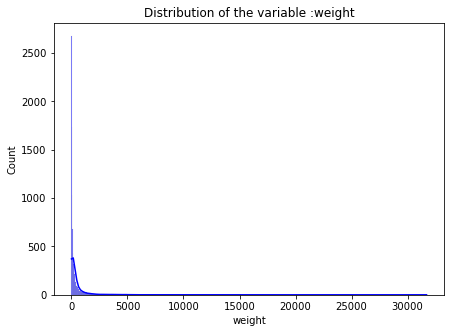

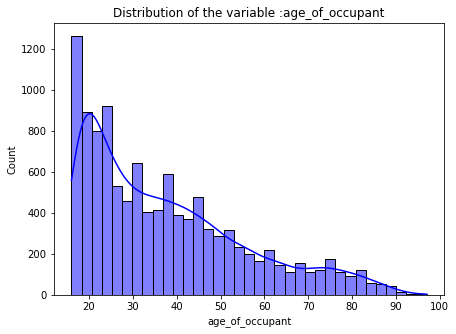

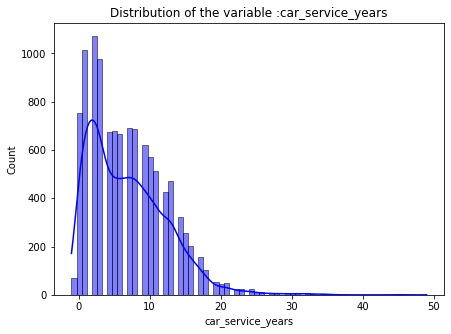

In [256]:
for feature in df_num:
    plt.figure(figsize=(7,5))
    sns.histplot(df[feature],kde=True,color='blue') # hist plot to show distribution
    plt.title("Distribution of the variable :"+feature)
    plt.show()

Boxplot:

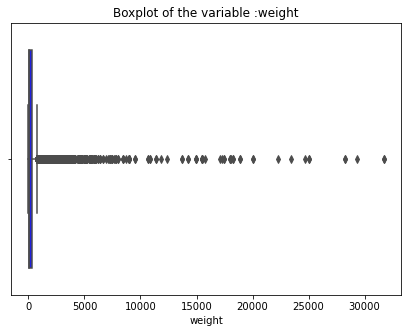

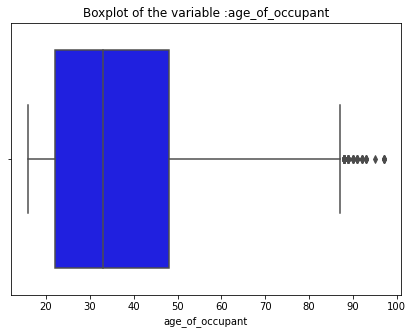

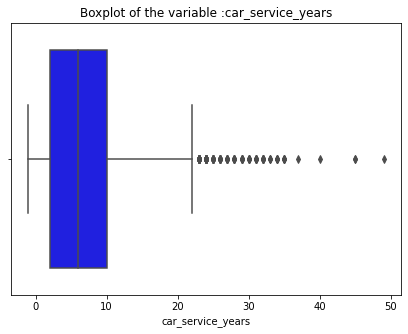

In [257]:
for feature in df_num:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=feature,data=df,color='blue') # boxplot to show the spread
    plt.title("Boxplot of the variable :"+feature)
    plt.show()

In [258]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=df[col].quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [259]:
# for loop to iterate through all the columns 
for feature in df_num:
    lower_range , upper_range = remove_outlier(feature) 
    df[feature] = np.where(df[feature]<lower_range,lower_range,df[feature]) # flooring 
    df[feature] = np.where(df[feature]>upper_range,upper_range,df[feature]) # capping

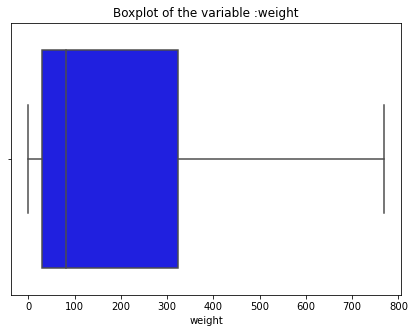

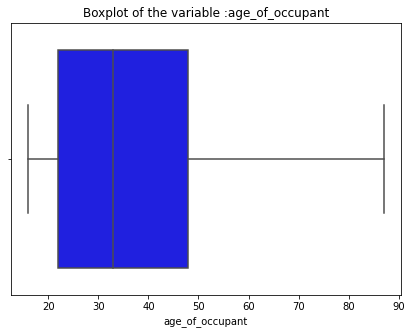

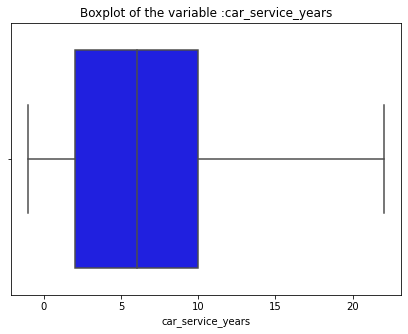

In [260]:
for feature in df_num:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=feature,data=df,color='blue') # boxplot to show the spread
    plt.title("Boxplot of the variable :"+feature)
    plt.show()

**We have treated the outliers using flooring and capping method**

### Categorical variables:

In [261]:
df['Survived'].value_counts(normalize=True)

survived        0.894803
Not_Survived    0.105197
Name: Survived, dtype: float64

* Our Target class is Not_Survived and 10.5% of the information is available for study
*  Statistically the data seems is unbalanced

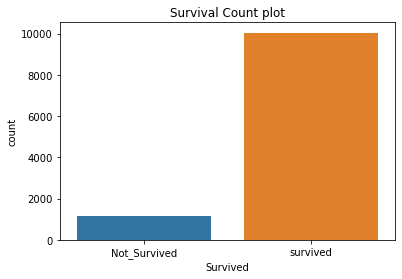

In [262]:
sns.countplot(x='Survived',data=df);
plt.title("Survival Count plot")
plt.show()

In [263]:
for feature in df_categorical:
    print(".................................................................")
    print(pd.crosstab(df['Survived'],df[feature],normalize=True,margins=True))
    print(".................................................................")

.................................................................
impact_speeds   1-9km/h     10-24     25-39     40-54       55+       All
Survived                                                                 
Not_Survived   0.000267  0.010163  0.027102  0.030668  0.036997  0.105197
survived       0.024873  0.472497  0.273157  0.089150  0.035125  0.894803
All            0.025140  0.482660  0.300259  0.119818  0.072123  1.000000
.................................................................
.................................................................
Survived      Not_Survived  survived       All
Survived                                      
Not_Survived      0.105197  0.000000  0.105197
survived          0.000000  0.894803  0.894803
All               0.105197  0.894803  1.000000
.................................................................
.................................................................
seatbelt        belted      none       All
Survived              

In [264]:
df_categorical

['impact_speeds',
 'Survived',
 'seatbelt',
 'frontal',
 'sex',
 'airbag_deploy_type',
 'Occupant_role',
 'injSeverity']

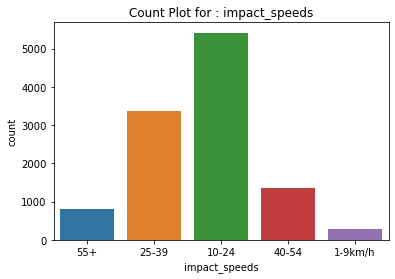

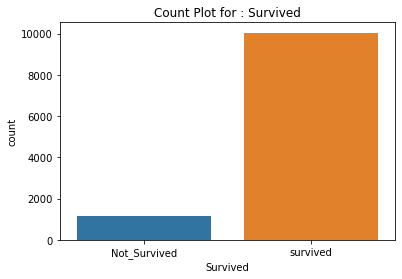

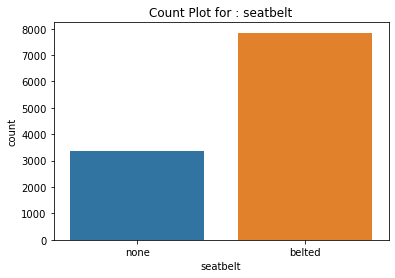

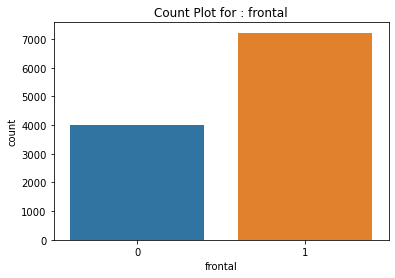

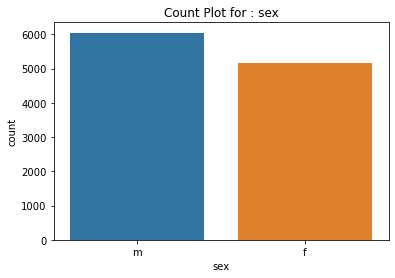

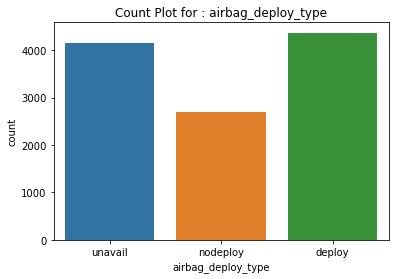

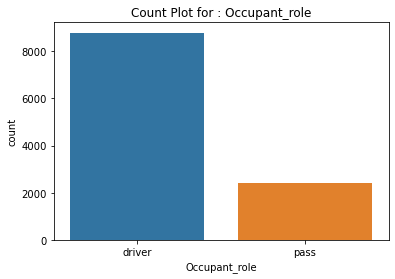

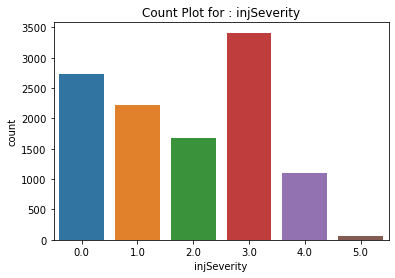

In [265]:
for feature in df_categorical:
    sns.countplot(x=df[feature],data=df);
    plt.title("Count Plot for : " + feature)
    plt.show()
    

### Bivariate analysis:

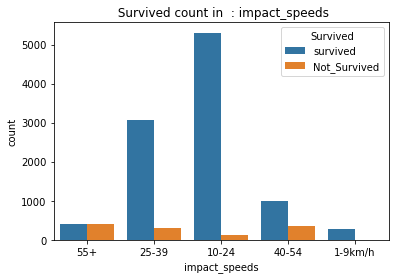

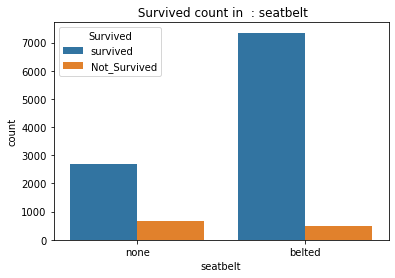

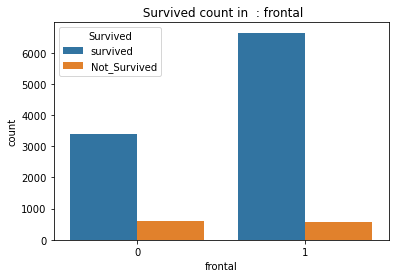

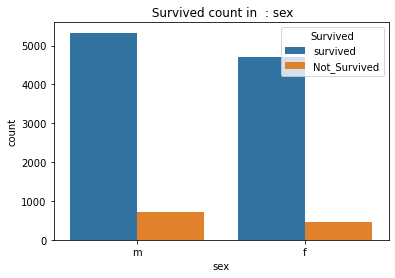

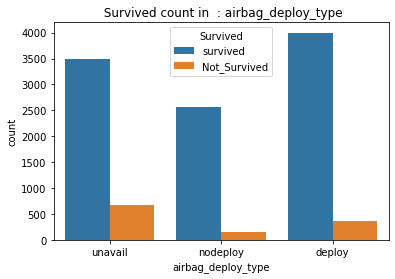

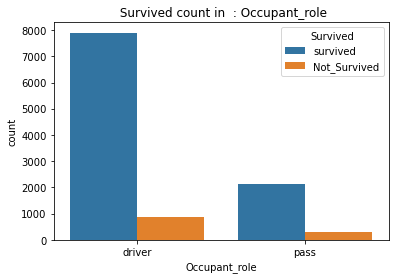

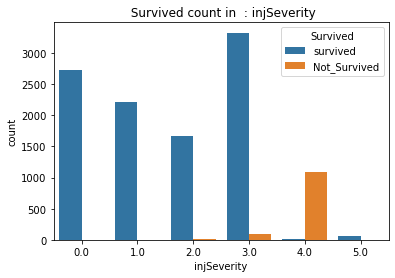

In [266]:
bivariate_cat = ['impact_speeds','seatbelt', 'frontal', 'sex', 'airbag_deploy_type', 'Occupant_role', 'injSeverity']
for feature in bivariate_cat:
    sns.countplot(x=df[feature],data=df,hue='Survived',hue_order=['survived','Not_Survived']);
    plt.title(" Survived count in  : " + feature)
    plt.show()

### Encoding of Categorical variables:

* Categorical encoding is a process of converting categories to numbers.
    The two most widely used techniques are 
    1. Label Encoding : In this technique, each label is assigned a unique integer based on alphabetical ordering.
    2. One-Hot Encoding :It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.
    One-Hot Encoding is the process of creating dummy variables.

Encoding approach:

impact_speeds , injseverity and airbag_deploy_type are ordinal variables 

remaining are nominal variables 

In [267]:
df_categorical

['impact_speeds',
 'Survived',
 'seatbelt',
 'frontal',
 'sex',
 'airbag_deploy_type',
 'Occupant_role',
 'injSeverity']

In [268]:
df['impact_speeds'].unique()

array(['55+', '25-39', '10-24', '40-54', '1-9km/h'], dtype=object)

In [269]:
df['impact_speeds'] = np.where((df['impact_speeds']=='1-9km/h'),1,df['impact_speeds'])
df['impact_speeds'] = np.where((df['impact_speeds']=='10-24'),2,df['impact_speeds'])
df['impact_speeds'] = np.where((df['impact_speeds']=='25-39'),3,df['impact_speeds'])
df['impact_speeds'] = np.where((df['impact_speeds']=='40-54'),4,df['impact_speeds'])
df['impact_speeds'] = np.where((df['impact_speeds']=='55+'),5,df['impact_speeds'])

In [270]:
df['Survived'] = np.where((df['Survived']=='Not_Survived'),1,0)

In [271]:
df['seatbelt'] = np.where((df['seatbelt']=='belted'),0,1)

In [272]:
df['airbag_deploy_type'] = np.where((df['airbag_deploy_type']=='unavail'),3,df['airbag_deploy_type'])
df['airbag_deploy_type'] = np.where((df['airbag_deploy_type']=='nodeploy'),2,df['airbag_deploy_type'])
df['airbag_deploy_type'] = np.where((df['airbag_deploy_type']=='deploy'),1,df['airbag_deploy_type'])

In [273]:
# One Hot encodig 
df= pd.get_dummies(df,columns = ['sex','Occupant_role'],drop_first=True)

In [274]:
df

,impact_speeds,weight,Survived,seatbelt,frontal,age_of_occupant,airbag_deploy_type,injSeverity,car_service_years,sex_m,Occupant_role_pass
0,5,27.078,1,1,1,32.0,3,4.0,10.0,1,0
1,3,89.627,1,0,0,54.0,2,4.0,3.0,0,0
2,5,27.078,1,0,1,67.0,3,4.0,5.0,1,0
3,5,27.078,1,0,1,64.0,3,4.0,5.0,0,1
4,5,13.374,1,1,1,23.0,3,4.0,11.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11212,3,767.702,0,0,1,17.0,3,0.0,17.0,1,0
11213,2,71.228,0,0,1,54.0,2,2.0,0.0,1,0
11214,2,10.474,0,0,1,27.0,1,3.0,12.0,0,0
11215,3,10.474,0,0,1,18.0,1,0.0,3.0,0,0


### Scaling the Numeric Variable 
The numeric variables weith and age_ofthe_occupant and ageofthecar are at different magnitudes hence we do scale them before feeding to the model

In [275]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [276]:
df['weight'] = (df['weight']-df['weight'].min())/(df['weight'].max()-df['weight'].min())

In [277]:
df['age_of_occupant'] = (df['age_of_occupant']-df['age_of_occupant'].min())/(df['age_of_occupant'].max()-df['age_of_occupant'].min())
df['car_service_years'] = (df['car_service_years']-df['car_service_years'].min())/(df['car_service_years'].max()-df['car_service_years'].min())

In [278]:
df

,impact_speeds,weight,Survived,seatbelt,frontal,age_of_occupant,airbag_deploy_type,injSeverity,car_service_years,sex_m,Occupant_role_pass
0,5,0.035271,1,1,1,0.225352,3,4.0,0.478261,1,0
1,3,0.116747,1,0,0,0.535211,2,4.0,0.173913,0,0
2,5,0.035271,1,0,1,0.718310,3,4.0,0.260870,1,0
3,5,0.035271,1,0,1,0.676056,3,4.0,0.260870,0,1
4,5,0.017421,1,1,1,0.098592,3,4.0,0.521739,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11212,3,1.000000,0,0,1,0.014085,3,0.0,0.782609,1,0
11213,2,0.092781,0,0,1,0.535211,2,2.0,0.043478,1,0
11214,2,0.013643,0,0,1,0.154930,1,3.0,0.565217,0,0
11215,3,0.013643,0,0,1,0.028169,1,0.0,0.173913,0,0


# Model Building:

In [279]:
# Train_Test_Split : 70:30
X =  df.drop('Survived',axis=1)
y = df['Survived']

In [280]:
# Split X and y into training and test set in 75:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [281]:
# Checking dimensions on the train and test data
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (7851, 10)
X_test:  (3366, 10)
y_train:  (7851,)
y_test:  (3366,)


### Finding best parameters for Logistic regression using GridsearchCV

In [282]:
from sklearn.model_selection import GridSearchCV

In [283]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [284]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [285]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [286]:
# Fit the model 

grid_search.fit(X_train, y_train) # fit our train data onto the model


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [287]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [288]:
model = grid_search.best_estimator_

### Train data performance: logistic regression

In [289]:
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix,precision_score,recall_score,roc_auc_score, roc_curve

In [290]:
ytrain_predict = model.predict(X_train)

In [291]:
print("Train Accuracy Score for model {} is {}".format(model,round(accuracy_score(y_train,ytrain_predict),4)))

Train Accuracy Score for model LogisticRegression(max_iter=10000, n_jobs=2, solver='sag') is 0.9806


In [292]:
print("--------------------Classification Report - Train Data--------------------")
print(classification_report(y_train,ytrain_predict))

--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7025
           1       0.93      0.89      0.91       826

    accuracy                           0.98      7851
   macro avg       0.96      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851



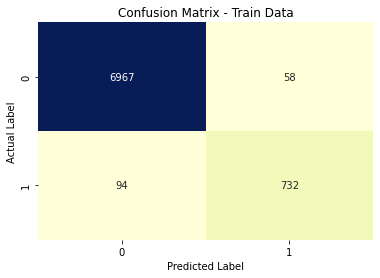

In [293]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',
        cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data')
plt.show()

In [294]:
X_test

,impact_speeds,weight,seatbelt,frontal,age_of_occupant,airbag_deploy_type,injSeverity,car_service_years,sex_m,Occupant_role_pass
9902,4,0.019383,0,1,0.267606,1,2.0,0.086957,1,0
3514,2,0.213279,0,1,0.084507,3,0.0,0.608696,1,0
8332,3,0.024523,0,1,0.507042,1,1.0,0.434783,1,0
4498,5,0.098429,1,1,0.042254,1,4.0,0.260870,1,1
4918,2,0.194018,0,1,0.098592,2,0.0,0.086957,1,0
...,...,...,...,...,...,...,...,...,...,...
4123,3,0.336489,0,0,0.225352,2,0.0,0.086957,1,0
5172,2,0.208664,0,0,0.408451,2,1.0,0.434783,0,1
3691,4,0.094016,1,1,0.014085,3,3.0,0.565217,1,1
5901,2,1.000000,0,0,0.070423,3,0.0,0.521739,1,0


In [295]:
X_train

,impact_speeds,weight,seatbelt,frontal,age_of_occupant,airbag_deploy_type,injSeverity,car_service_years,sex_m,Occupant_role_pass
7983,2,0.533832,0,1,0.605634,1,2.0,0.260870,1,0
838,2,0.013780,1,1,0.169014,3,0.0,0.782609,1,0
10490,3,0.073358,1,1,0.028169,1,3.0,0.217391,1,0
9555,2,0.014426,1,0,0.169014,3,3.0,0.695652,0,0
9332,3,0.354511,1,0,0.676056,2,3.0,0.086957,1,0
...,...,...,...,...,...,...,...,...,...,...
7599,2,0.166813,0,0,0.281690,2,2.0,0.130435,0,0
5809,2,0.072395,0,1,0.492958,1,3.0,0.304348,1,0
519,2,0.089841,1,0,0.957746,2,3.0,0.391304,1,1
1093,1,0.019601,0,1,0.098592,1,1.0,0.086957,0,1


AUC Score for the Training Data : 0.986


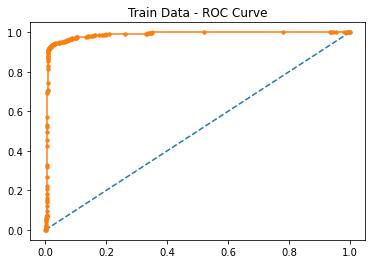

In [296]:
 # AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(np.array(X_train))
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC Score for the Training Data : %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_train, tpr_train, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_train, tpr_train, marker='.')
plt.title('Train Data - ROC Curve')
# show the plot
plt.show()

### Test data performance: logistic regression

In [297]:
ytest_predict = model.predict(X_test)

In [298]:
print("Test Accuracy Score for model {} is {}".format(model,round(accuracy_score(y_test,ytest_predict),4)))

Test Accuracy Score for model LogisticRegression(max_iter=10000, n_jobs=2, solver='sag') is 0.9816


In [299]:
print("--------------------Classification Report - Test Data--------------------")
print(classification_report(y_test,ytest_predict))

--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3012
           1       0.93      0.90      0.91       354

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366



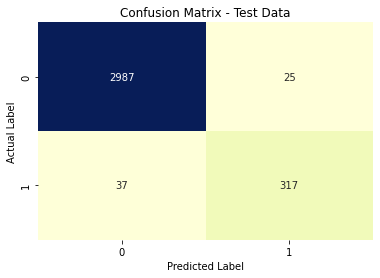

In [300]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',
        cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data')
plt.show()

AUC Score for the Test Data : 0.990


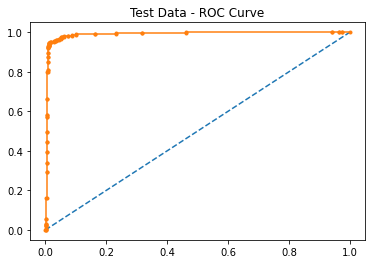

In [301]:
 # AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(np.array(X_test))
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC Score for the Test Data : %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_test, tpr_test, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_test, tpr_test, marker='.')
plt.title('Test Data - ROC Curve')
# show the plot
plt.show()

In [302]:
DDFFSDFDSFSDS.MEAN(

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_23884/235279450.py, line 1)

## Feature Importance-Logistic Regression

In [303]:
model

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')

In [313]:
# get importance
importance = model.coef_[0]
# summarize feature importance
list_= []
imp = []
for i,v in enumerate(importance):
    list_.append(i)
    imp.append(v)


In [308]:
imp

[0.8407176334407664,
 -3.475809751541451,
 0.7637444963026369,
 -0.9517703739305174,
 2.3164320519781985,
 0.3684824205105042,
 4.203291934702835,
 -0.6678246961765258,
 0.3635857392378272,
 0.32764548936870685]

In [314]:
important_df = pd.DataFrame(X_train.columns,columns=['feature'])
important_df['importance'] = imp

In [317]:
important_df.sort_values(by='importance',ascending=False)

,feature,importance
6,injSeverity,4.203292
4,age_of_occupant,2.316432
0,impact_speeds,0.840718
2,seatbelt,0.763744
5,airbag_deploy_type,0.368482
8,sex_m,0.363586
9,Occupant_role_pass,0.327645
7,car_service_years,-0.667825
3,frontal,-0.951770
1,weight,-3.475810


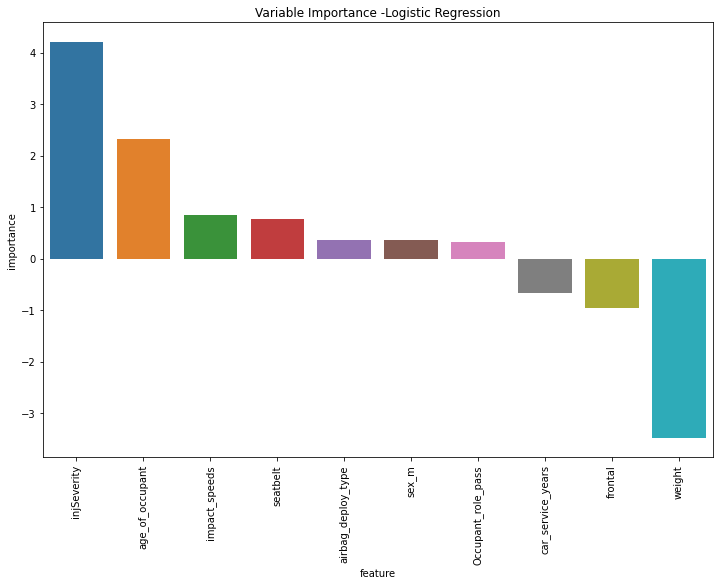

In [316]:
# plot feature importance
from matplotlib import pyplot
plt.figure(figsize=(12,8))
sns.barplot(x='feature',y='importance',data=important_df.sort_values(by="importance",ascending=False));
plt.title("Variable Importance -Logistic Regression")
plt.xticks(rotation=90)
plt.show()

### Top 5 features help us predict the survival are 
1. injseverity
2.age_of_occupant
3.Impact speed
4.Seatbelt
5.air_bag_deploy_type

## LDA Model

**Building the Model**

In [324]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [325]:
# create an object of lineardescriminant model
model = LinearDiscriminantAnalysis()

In [326]:
# fit the x_train and y_train on the model
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

**Evaluating the Model**

**Train data performance: LDA Model**

In [327]:
ytrain_predict = model.predict(X_train)

In [328]:
print("Train Accuracy Score for model {} is {}".format(model,round(accuracy_score(y_train,ytrain_predict),4)))

Train Accuracy Score for model LinearDiscriminantAnalysis() is 0.9497


In [329]:
print("--------------------Classification Report - Train Data--------------------")
print(classification_report(y_train,ytrain_predict))


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7025
           1       0.81      0.68      0.74       826

    accuracy                           0.95      7851
   macro avg       0.89      0.83      0.86      7851
weighted avg       0.95      0.95      0.95      7851



Observation:
1. Recall is poor compared to the Logistic regression model 
2. Accuracy is good but given the imbalance on the dataset we can not rely on the accuracy of the model

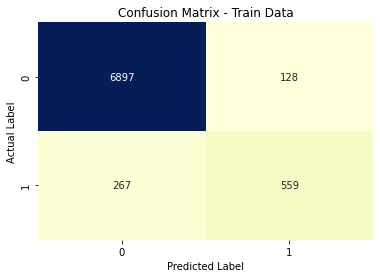

In [330]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',
        cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data')
plt.show()

**Out of the 826 cases of our interest our model is able to predict only 559**

AUC Score for the Training Data : 0.971


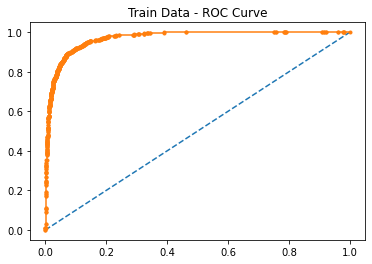

In [331]:
 # AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(np.array(X_train))
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC Score for the Training Data : %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_train, tpr_train, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_train, tpr_train, marker='.')
plt.title('Train Data - ROC Curve')
# show the plot
plt.show()

### Test data Performance - LDA Model

In [332]:
ytest_predict = model.predict(X_test)


In [333]:
print("Test Accuracy Score for model {} is {}".format(model,round(accuracy_score(y_test,ytest_predict),4)))

Test Accuracy Score for model LinearDiscriminantAnalysis() is 0.9513


In [334]:
print("--------------------Classification Report - Test Data--------------------")
print(classification_report(y_test,ytest_predict))


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3012
           1       0.82      0.69      0.75       354

    accuracy                           0.95      3366
   macro avg       0.89      0.84      0.86      3366
weighted avg       0.95      0.95      0.95      3366



**Observation:**
1. Recall is poor compared to the Logistic regression model 
2. Accuracy is good but given the imbalance on the dataset we can not rely on the accuracy of the model

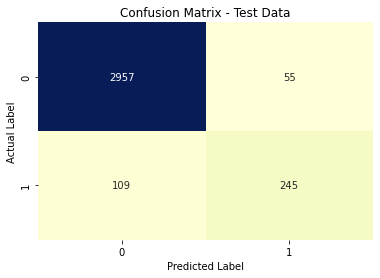

In [335]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',
        cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data')
plt.show()

**109 cases were not survived but the model predicted that they will survive**

AUC Score for the Test Data : 0.977


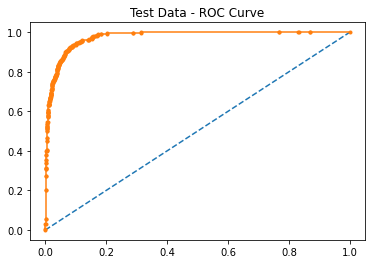

In [336]:
 # AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(np.array(X_test))
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC Score for the Test Data : %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_test, tpr_test, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_test, tpr_test, marker='.')
plt.title('Test Data - ROC Curve')
# show the plot
plt.show()

## Final Conclusion :
- Our target variable here is to predict whether the person wil survive or not 
- Since we have 89.5:10.5 proportion of Survived and not survived which is statisticallly imbalanced we can not make Accuracy as our measure of model performance 
- Recall and F1 Score are the best metrics for our case
- False Negatives are of interest for us 
- Out of the 2 models Logistic regression has 
        Train - Recall : 0.89
        Test - recall : 0.90
   For LDA Model  :
         Train - recall : 0.67
         Test - recall : 0.68

# So we choose Logistic regressio model for our prediction

END